<a href="https://colab.research.google.com/github/Bimal-Kumar-002/Data_dict-and-pivot-table/blob/master/Time_series_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
#%cd /gdrive

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv("/content/gdrive/My Drive/Time-series forcasting/Data/Nifty.csv")

In [4]:
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover,year
0,01-01-1997,905.20,941.40,905.20,939.55,38948210,978.21,1997
1,02-01-1997,941.95,944.00,925.05,927.05,49118380,1150.42,1997
2,03-01-1997,924.30,932.60,919.55,931.65,35263845,866.74,1997
3,06-01-1997,932.45,937.95,925.65,927.80,26323660,665.51,1997
4,07-01-1997,926.35,935.15,922.25,928.80,44473415,1050.05,1997


In [5]:
df= data.iloc[0:,1:5]

In [6]:
df.head()

,Open,High,Low,Close
0,905.20,941.40,905.20,939.55
1,941.95,944.00,925.05,927.05
2,924.30,932.60,919.55,931.65
3,932.45,937.95,925.65,927.80
4,926.35,935.15,922.25,928.80


In [7]:
#df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df1 = df

In [9]:
df1.columns = df1.columns.str.replace(' ','_')

In [10]:
df1.columns = ['Open_Price','High_Price','Low_Price',	'Close_Price']

In [11]:
df1.head()

,Open_Price,High_Price,Low_Price,Close_Price
0,905.20,941.40,905.20,939.55
1,941.95,944.00,925.05,927.05
2,924.30,932.60,919.55,931.65
3,932.45,937.95,925.65,927.80
4,926.35,935.15,922.25,928.80


In [12]:
df1.tail()

,Open_Price,High_Price,Low_Price,Close_Price
5472,10780.90,10782.30,10649.25,10663.50
5473,10635.45,10747.50,10534.55,10729.85
5474,10817.90,10834.20,10764.45,10779.80
5475,10820.95,10893.60,10817.15,10859.90
5476,10913.20,10923.55,10853.20,10862.55


In [13]:
df1.isnull().sum()

Open_Price     0
High_Price     0
Low_Price      0
Close_Price    0
dtype: int64

In [14]:
print('There are {} number of days in the dataset'.format(df1.shape[0]))

There are 5477 number of days in the dataset


In [15]:
df1.describe()

,Open_Price,High_Price,Low_Price,Close_Price
count,5477.000000,5477.00000,5477.000000,5477.000000
mean,4287.042432,4317.34361,4252.365949,4285.387347
std,3019.944259,3029.37335,3004.452510,3017.022122
min,808.600000,817.40000,800.100000,808.700000
25%,1323.150000,1341.75000,1306.250000,1323.300000
50%,4089.600000,4140.25000,4057.550000,4089.900000
75%,6035.950000,6069.45000,5984.900000,6024.050000
max,11751.800000,11760.20000,11710.500000,11738.500000


In [16]:
import copy
tek_ind1 = copy.deepcopy(df1)
tek_ind2 = copy.deepcopy(df1)

In [17]:
tek_ind1.head()

,Open_Price,High_Price,Low_Price,Close_Price
0,905.20,941.40,905.20,939.55
1,941.95,944.00,925.05,927.05
2,924.30,932.60,919.55,931.65
3,932.45,937.95,925.65,927.80
4,926.35,935.15,922.25,928.80


In [18]:
tek_ind1['daily_return'] = tek_ind1.Close_Price.pct_change().fillna(0) # daily return

In [19]:
tek_ind1.head()

,Open_Price,High_Price,Low_Price,Close_Price,daily_return
0,905.20,941.40,905.20,939.55,0.000000
1,941.95,944.00,925.05,927.05,-0.013304
2,924.30,932.60,919.55,931.65,0.004962
3,932.45,937.95,925.65,927.80,-0.004132
4,926.35,935.15,922.25,928.80,0.001078


In [20]:
tek_ind1['cum_daily_return'] = (1+tek_ind1.daily_return).cumprod()

In [21]:
tek_ind1.head()

,Open_Price,High_Price,Low_Price,Close_Price,daily_return,cum_daily_return
0,905.20,941.40,905.20,939.55,0.000000,1.000000
1,941.95,944.00,925.05,927.05,-0.013304,0.986696
2,924.30,932.60,919.55,931.65,0.004962,0.991592
3,932.45,937.95,925.65,927.80,-0.004132,0.987494
4,926.35,935.15,922.25,928.80,0.001078,0.988558


In [22]:
tek_ind1['H-L'] = tek_ind1.High_Price - df1.Low_Price

In [23]:
tek_ind1.head(3)

,Open_Price,High_Price,Low_Price,Close_Price,daily_return,cum_daily_return,H-L
0,905.20,941.4,905.20,939.55,0.000000,1.000000,36.20
1,941.95,944.0,925.05,927.05,-0.013304,0.986696,18.95
2,924.30,932.6,919.55,931.65,0.004962,0.991592,13.05


In [24]:
tek_ind1['C-O'] = tek_ind1.Close_Price- tek_ind1.Open_Price

In [25]:
tek_ind1.head(3)

,Open_Price,High_Price,Low_Price,Close_Price,daily_return,cum_daily_return,H-L,C-O
0,905.20,941.4,905.20,939.55,0.000000,1.000000,36.20,34.35
1,941.95,944.0,925.05,927.05,-0.013304,0.986696,18.95,-14.90
2,924.30,932.6,919.55,931.65,0.004962,0.991592,13.05,7.35


In [26]:
tek_ind1['10day_MA'] = tek_ind1.Close_Price.shift(1).rolling(window=10).mean().fillna(0)

In [27]:
tek_ind1['50day_MA'] = tek_ind1.Close_Price.shift(1).rolling(window=50).mean().fillna(0)

In [28]:
tek_ind1['200day_MA'] = tek_ind1.Close_Price.shift(1).rolling(window=200).mean().fillna(0)

[Link for install tallib]('https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab')

# Install talib

In [29]:
import sys
print(sys.version)


3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]


In [30]:
%%bash
python --version

Python 3.6.9


In [31]:
%%bash
! wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
#


--2020-09-25 05:42:37--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-09-25 05:42:37--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-09-25 05:42:37--  https://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving nchc.dl.sourceforge.ne

In [32]:
%%bash
! tar -xvf ta-lib-0.4.0-src.tar.gz


ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/output.1
ta-lib/autom4te.cache/traces.0
ta-lib/autom4te.cache/traces.1
ta-lib/ltmain.sh
ta-lib/ta-lib-config.in
ta-lib/src/
ta-lib/src/ta_func/
ta-lib/src/ta_func/ta_MACDFIX.c
ta-lib/src/ta_func/ta_CDLPIERCING.c
ta-lib/src/ta_func/ta_DIV.c
ta-lib/src/ta_func/ta_ROCR100.c
ta-lib/src/ta_func/ta_ADXR.c
ta-lib/src/ta_func/ta_MAVP.c
ta-lib/src/ta_func/ta_CDLCLOSINGMARUBOZU.c
ta-lib/src/ta_func/ta_COSH.

In [33]:
%cd ta-lib
!./configure --prefix=/usr
!make



/content/ta-lib
checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /bin/sed
checking for grep that handles long lines and -e... /bin/grep


In [34]:
!make install
!pip install Ta-Lib


Making install in src
make[1]: Entering directory '/content/ta-lib/src'
Making install in ta_abstract
make[2]: Entering directory '/content/ta-lib/src/ta_abstract'
make[3]: Entering directory '/content/ta-lib/src/ta_abstract'
make[3]: Nothing to be done for 'install-exec-am'.
test -z "/usr/include/ta-lib/" || /bin/mkdir -p "/usr/include/ta-lib/"
 /usr/bin/install -c -m 644 '../../include/ta_defs.h' '/usr/include/ta-lib//ta_defs.h'
 /usr/bin/install -c -m 644 '../../include/ta_libc.h' '/usr/include/ta-lib//ta_libc.h'
 /usr/bin/install -c -m 644 '../../include/ta_abstract.h' '/usr/include/ta-lib//ta_abstract.h'
make[3]: Leaving directory '/content/ta-lib/src/ta_abstract'
make[2]: Leaving directory '/content/ta-lib/src/ta_abstract'
Making install in ta_common
make[2]: Entering directory '/content/ta-lib/src/ta_common'
make[3]: Entering directory '/content/ta-lib/src/ta_common'
make[3]: Nothing to be done for 'install-exec-am'.
test -z "/usr/include/ta-lib/" || /bin/mkdir -p "/usr/include/

# import talib

In [35]:
import talib # for technical analysis

In [36]:
tek_ind1['resi']=talib.RSI(tek_ind1.Close_Price.values,
                          timeperiod=14)

In [37]:
tek_ind1['Williams_%R']= talib.WILLR(tek_ind1.High_Price.values,
                                  tek_ind1.Low_Price.values,
                                    tek_ind1.Close_Price.values,14)

In [38]:
# create moving avg of 7,21 days

In [39]:
tek_ind1['ma7'] = tek_ind1.Close_Price.rolling(window=7).mean().fillna(0)

In [40]:
tek_ind1['ma21'] = tek_ind1.Close_Price.rolling(window=21).mean().fillna(0)

In [41]:
# Create MACD
tek_ind1['ema_26'] = tek_ind1.Close_Price.ewm(span=26).mean().fillna(0)
tek_ind1['ema_12']= tek_ind1.Close_Price.ewm(span=12).mean().fillna(0)

In [42]:
tek_ind1['macd'] = (tek_ind1['ema_12']-tek_ind1['ema_26'])

In [43]:
tek_ind1.head()

,Open_Price,High_Price,Low_Price,Close_Price,daily_return,cum_daily_return,H-L,C-O,10day_MA,50day_MA,200day_MA,resi,Williams_%R,ma7,ma21,ema_26,ema_12,macd
0,905.20,941.40,905.20,939.55,0.000000,1.000000,36.20,34.35,0.0,0.0,0.0,NaN,NaN,0.0,0.0,939.550000,939.550000,0.000000
1,941.95,944.00,925.05,927.05,-0.013304,0.986696,18.95,-14.90,0.0,0.0,0.0,NaN,NaN,0.0,0.0,933.059615,932.779167,-0.280449
2,924.30,932.60,919.55,931.65,0.004962,0.991592,13.05,7.35,0.0,0.0,0.0,NaN,NaN,0.0,0.0,932.553154,932.338453,-0.214702
3,932.45,937.95,925.65,927.80,-0.004132,0.987494,12.30,-4.65,0.0,0.0,0.0,NaN,NaN,0.0,0.0,931.224380,930.905841,-0.318540
4,926.35,935.15,922.25,928.80,0.001078,0.988558,12.90,2.45,0.0,0.0,0.0,NaN,NaN,0.0,0.0,930.662156,930.333691,-0.328465


In [44]:
# creating bolinger bands
# set number of days as standerd deviation to use for rolling lookback period for Bollinger band calculation

In [45]:
window=21
no_of_std=2
# calculation rolling mean & standerd devition using number of days set above
rolling_mean = tek_ind1.Close_Price.rolling(window).mean()

In [46]:
rolling_std = tek_ind1.Close_Price.rolling(window).std()

In [47]:
# create two new DataFrame columns to hold value of upper and lower bollinger bands
# B['Rolling_Mean'] = rolling_mean.fillna(0)
tek_ind1['bb_high'] = (rolling_mean + (rolling_std+no_of_std)).fillna(0)
tek_ind1['bb_low'] = (rolling_mean - (rolling_std+no_of_std)).fillna(0)


In [48]:
# create Exponential moving average
tek_ind1['ema'] = tek_ind1.Close_Price.ewm(com=0.5).mean()
# create Momentum
tek_ind1['momentum'] = tek_ind1.Close_Price-1
tek_ind1.head(20)

,Open_Price,High_Price,Low_Price,Close_Price,daily_return,cum_daily_return,H-L,C-O,10day_MA,50day_MA,200day_MA,resi,Williams_%R,ma7,ma21,ema_26,ema_12,macd,bb_high,bb_low,ema,momentum
0,905.20,941.40,905.20,939.55,0.000000,1.000000,36.20,34.35,0.000,0.0,0.0,NaN,NaN,0.000000,0.0,939.550000,939.550000,0.000000,0.0,0.0,939.550000,938.55
1,941.95,944.00,925.05,927.05,-0.013304,0.986696,18.95,-14.90,0.000,0.0,0.0,NaN,NaN,0.000000,0.0,933.059615,932.779167,-0.280449,0.0,0.0,930.175000,926.05
2,924.30,932.60,919.55,931.65,0.004962,0.991592,13.05,7.35,0.000,0.0,0.0,NaN,NaN,0.000000,0.0,932.553154,932.338453,-0.214702,0.0,0.0,931.196154,930.65
3,932.45,937.95,925.65,927.80,-0.004132,0.987494,12.30,-4.65,0.000,0.0,0.0,NaN,NaN,0.000000,0.0,931.224380,930.905841,-0.318540,0.0,0.0,928.903750,926.80
4,926.35,935.15,922.25,928.80,0.001078,0.988558,12.90,2.45,0.000,0.0,0.0,NaN,NaN,0.000000,0.0,930.662156,930.333691,-0.328465,0.0,0.0,928.834298,927.80
5,937.35,953.10,937.35,946.70,0.019272,1.007610,15.75,9.35,0.000,0.0,0.0,NaN,NaN,0.000000,0.0,933.874408,934.311565,0.437157,0.0,0.0,940.761126,945.70
6,945.15,959.75,943.60,956.60,0.010457,1.018147,16.15,11.45,0.000,0.0,0.0,NaN,NaN,936.878571,0.0,937.916037,939.285151,1.369114,0.0,0.0,951.325206,955.60
7,962.70,984.10,962.70,980.35,0.024828,1.043425,21.40,17.65,0.000,0.0,0.0,NaN,NaN,942.707143,0.0,944.753200,947.854752,3.101552,0.0,0.0,970.678018,979.35
8,978.55,982.25,965.50,980.70,0.000357,1.043798,16.75,2.15,0.000,0.0,0.0,NaN,NaN,950.371429,0.0,950.081305,954.352711,4.271407,0.0,0.0,977.359679,979.70
9,984.00,994.40,977.70,989.30,0.008769,1.052951,16.70,5.30,0.000,0.0,0.0,NaN,NaN,958.607143,0.0,955.493103,960.975209,5.482106,0.0,0.0,985.320028,988.30


In [49]:
import matplotlib.pyplot as plt

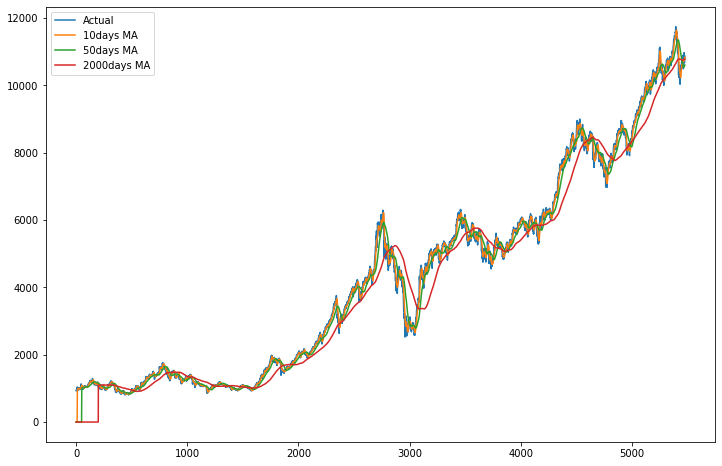

In [50]:
plt.figure(figsize=(12,8))
plt.plot(tek_ind1.Close_Price, label='Actual')
plt.plot(tek_ind1['10day_MA'], label='10days MA')
plt.plot(tek_ind1['50day_MA'], label='50days MA')
plt.plot(tek_ind1['200day_MA'], label='2000days MA')
plt.legend(loc='best')
plt.show()

In [51]:
tek_ind1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477 entries, 0 to 5476
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Price        5477 non-null   float64
 1   High_Price        5477 non-null   float64
 2   Low_Price         5477 non-null   float64
 3   Close_Price       5477 non-null   float64
 4   daily_return      5477 non-null   float64
 5   cum_daily_return  5477 non-null   float64
 6   H-L               5477 non-null   float64
 7   C-O               5477 non-null   float64
 8   10day_MA          5477 non-null   float64
 9   50day_MA          5477 non-null   float64
 10  200day_MA         5477 non-null   float64
 11  resi              5463 non-null   float64
 12  Williams_%R       5464 non-null   float64
 13  ma7               5477 non-null   float64
 14  ma21              5477 non-null   float64
 15  ema_26            5477 non-null   float64
 16  ema_12            5477 non-null   float64


In [52]:
#tek_ind2 dataframe
#Calculation of Stochastic Oscillator (%K,& %D)

In [53]:
def stock(tek_ind2,n):
    tek_ind2['stok']=(tek_ind2.Close_Price-tek_ind2.Low_Price.rolling(window=n, center=False).mean())/(tek_ind2.High_Price.rolling(window=n,center=False).max()-
                                                                                                      tek_ind2.Low_Price.rolling(window=n,center=False).min())*100
    tek_ind2['stod'] = tek_ind2.stok.rolling(window=3,center=False).mean()
    return tek_ind2


In [54]:

tek_ind2=stock(tek_ind2,4)
tek_ind2 = tek_ind2.fillna(0)
tek_ind2.tail()

,Open_Price,High_Price,Low_Price,Close_Price,stok,stod
5472,10780.90,10782.30,10649.25,10663.50,-40.335665,-8.468612
5473,10635.45,10747.50,10534.55,10729.85,6.810767,-23.000524
5474,10817.90,10834.20,10764.45,10779.80,25.186437,-2.779487
5475,10820.95,10893.60,10817.15,10859.90,46.943323,26.313509
5476,10913.20,10923.55,10853.20,10862.55,30.902956,34.344239


In [55]:
tek_ind2.head()

,Open_Price,High_Price,Low_Price,Close_Price,stok,stod
0,905.20,941.40,905.20,939.55,0.000000,0.0
1,941.95,944.00,925.05,927.05,0.000000,0.0
2,924.30,932.60,919.55,931.65,0.000000,0.0
3,932.45,937.95,925.65,927.80,23.034794,0.0
4,926.35,935.15,922.25,928.80,23.210634,0.0


# CCI = (typical price − ma) / (0.015 * mean deviation)
    typical price = (high + low + close) / 3
    p = number of periods (20 commonly used)
    ma = moving average
    moving average = typical price / p
    mean deviation = (typical price — MA) / p
# Calculations of Ichimoku Cloud
    Turning Line = ( Highest High + Lowest Low ) / 2, for the past 9 days
    Standard Line = ( Highest High + Lowest Low ) / 2, for the past 26 days
    Leading Span 1 = ( Standard Line + Turning Line ) / 2, plotted 26 days ahead of today
    Leading Span 2 = ( Highest High + Lowest Low ) / 2, for the past 52 days, plotted 26 days ahead of today
    Cloud = Shaded Area between Span 1 and Span 2

In [56]:
# Calculation of Price Rate of change
# Roc = [(close-close n period ago)/(close n period ago)]*100


In [57]:

tek_ind2['ROC']=((tek_ind2.Close_Price-tek_ind2.Close_Price.shift(12))/
                (tek_ind2.Close_Price.shift(12)))*100
tek_ind2.fillna(0,inplace=True)

In [58]:
# Calculation of Momentum
tek_ind2['Momentum'] = tek_ind2.Close_Price - tek_ind2.Close_Price.shift(4)
tek_ind2.fillna(0,inplace=True)
# calculation of comodity channel Index
tp= (tek_ind2.High_Price + tek_ind2.Low_Price + tek_ind2.Close_Price)/3
ma = tp/20
md= (tp-ma)/20
tek_ind2['CCI'] = (tp-ma)/(0.015*md)


# Calculation of Triple Exponential Moving Average
    Triple Exponential Foarmula:
        T-EMA = (3EMA - 3EMA(EMA)+EMA(EMA(EMA)))
    Where
    EMA = EMA(1) + a*(Close_Price - EMA(1))
    
    a= 2/(N+1)
    N = The smoothing period

In [59]:
tek_ind2['ema'] = tek_ind2.Close_Price.ewm(span=3, min_periods=0,adjust=True,
                                          ignore_na=False).mean()
tek_ind2.fillna(0,inplace=True)
tek_ind2['tema'] = (3*tek_ind2.ema-3*tek_ind2.ema*tek_ind2.ema)+(tek_ind2['ema']*tek_ind2['ema']*tek_ind2['ema'])

In [60]:
# Turing Line
high = tek_ind2.High_Price.rolling(window=9,center=False).max()
low = tek_ind2.Low_Price.rolling(window=9,center=False).min()
tek_ind2['turing_line'] = (high+low)/2

In [61]:
# Standerd Line
p26_high = tek_ind2.High_Price.rolling(window=26,center=False).max()
p26_low = tek_ind2.Low_Price.rolling(window=26,center=False).min()
tek_ind2['standerd_line'] = (p26_high+p26_low)/2


In [62]:
# leading span1
tek_ind2['ichimoku_span1']=((tek_ind2.turing_line+ tek_ind2.standerd_line)/2).shift(26)
# leading span2
p52_high = tek_ind2.High_Price.rolling(window=52,center=False).max()
p52_low = tek_ind2.Low_Price.rolling(window=52,center=False).min()
tek_ind2['ichimoku_span']= (p52_high+p52_low).shift(26)

In [63]:
# The most current clossing price ploted 22 times periods behinds optional
tek_ind2['chiku_span'] = tek_ind2.Close_Price.shift(-22)

In [64]:
tek_ind2.head()

,Open_Price,High_Price,Low_Price,Close_Price,stok,stod,ROC,Momentum,CCI,ema,tema,turing_line,standerd_line,ichimoku_span1,ichimoku_span,chiku_span
0,905.20,941.40,905.20,939.55,0.000000,0.0,0.0,0.00,1333.333333,939.550000,8.267463e+08,NaN,NaN,NaN,NaN,948.20
1,941.95,944.00,925.05,927.05,0.000000,0.0,0.0,0.00,1333.333333,931.216667,8.049193e+08,NaN,NaN,NaN,NaN,958.30
2,924.30,932.60,919.55,931.65,0.000000,0.0,0.0,0.00,1333.333333,931.464286,8.055623e+08,NaN,NaN,NaN,NaN,962.50
3,932.45,937.95,925.65,927.80,23.034794,0.0,0.0,0.00,1333.333333,929.510000,8.004971e+08,NaN,NaN,NaN,NaN,967.75
4,926.35,935.15,922.25,928.80,23.210634,0.0,0.0,-10.75,1333.333333,929.143548,7.995497e+08,NaN,NaN,NaN,NaN,978.80


# Fourier transformation
<p>For data that is known to have seasonal, or daily patterns we’d like to use Fourier analysis to make predictions. It’s like a combination of extrapolation and de-noising. We want to repeat the observed data over multiple periods. and also want to find patterns by finding the dominant frequency components in the observed data. We will compute the Fourier transformation and the spectral density of the signal.</p>
    <h4> 1. The first step is to compute the FFT of the signal using the fft() function </h4>
    
   <h4> 2. Once the FFT has been obtained, we need to take the square of its absolute value in order to get the power spectral density (PSD)</h4>

In [65]:
close_fft = np.fft.fft(np.asarray(df1.Close_Price.to_list()))

In [66]:
fft_df = pd.DataFrame({'fft':close_fft})

In [67]:
fft_df['absolute'] = fft_df.fft.apply(lambda x:np.abs(x))

In [68]:
fft_df['angle'] = fft_df.fft.apply(lambda x: np.angle(x))

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


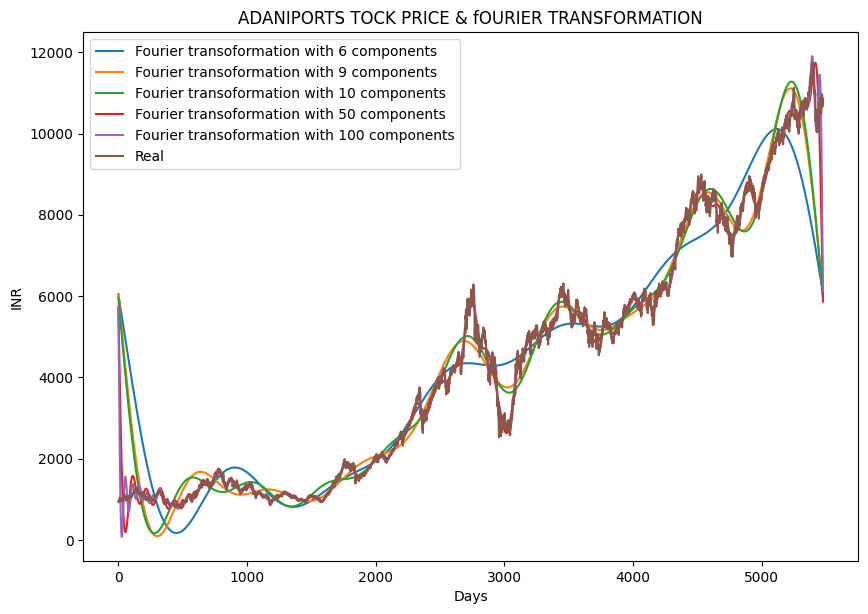

In [69]:
plt.figure(figsize=(10,7),dpi=100)
fft_list = np.asarray(fft_df.fft.to_list())
for num_ in [6,9,10,50,100]:
    fft_list_m10 = np.copy(fft_list);fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transoformation with {} components'.format(num_))
    
plt.plot(tek_ind2.Close_Price, label='Real')
plt.xlabel('Days')
plt.ylabel('INR')
plt.title('ADANIPORTS TOCK PRICE & fOURIER TRANSFORMATION')
plt.legend()
plt.show()

In [70]:
tek_ind2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477 entries, 0 to 5476
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open_Price      5477 non-null   float64
 1   High_Price      5477 non-null   float64
 2   Low_Price       5477 non-null   float64
 3   Close_Price     5477 non-null   float64
 4   stok            5477 non-null   float64
 5   stod            5477 non-null   float64
 6   ROC             5477 non-null   float64
 7   Momentum        5477 non-null   float64
 8   CCI             5477 non-null   float64
 9   ema             5477 non-null   float64
 10  tema            5477 non-null   float64
 11  turing_line     5469 non-null   float64
 12  standerd_line   5452 non-null   float64
 13  ichimoku_span1  5426 non-null   float64
 14  ichimoku_span   5400 non-null   float64
 15  chiku_span      5455 non-null   float64
dtypes: float64(16)
memory usage: 684.8 KB


In [71]:
# Data preparation for RNN
tek_ind1.columns

Index(['Open_Price', 'High_Price', 'Low_Price', 'Close_Price', 'daily_return',
       'cum_daily_return', 'H-L', 'C-O', '10day_MA', '50day_MA', '200day_MA',
       'resi', 'Williams_%R', 'ma7', 'ma21', 'ema_26', 'ema_12', 'macd',
       'bb_high', 'bb_low', 'ema', 'momentum'],
      dtype='object')

In [72]:
a,b=copy.deepcopy(tek_ind1),copy.deepcopy(tek_ind2)

In [73]:
print('Total dataset has {} sample, and {} feature'.format(a.shape[0],a.shape[1]))

Total dataset has 5477 sample, and 22 feature


In [74]:
a.fillna(0,inplace=True)
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477 entries, 0 to 5476
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Price        5477 non-null   float64
 1   High_Price        5477 non-null   float64
 2   Low_Price         5477 non-null   float64
 3   Close_Price       5477 non-null   float64
 4   daily_return      5477 non-null   float64
 5   cum_daily_return  5477 non-null   float64
 6   H-L               5477 non-null   float64
 7   C-O               5477 non-null   float64
 8   10day_MA          5477 non-null   float64
 9   50day_MA          5477 non-null   float64
 10  200day_MA         5477 non-null   float64
 11  resi              5477 non-null   float64
 12  Williams_%R       5477 non-null   float64
 13  ma7               5477 non-null   float64
 14  ma21              5477 non-null   float64
 15  ema_26            5477 non-null   float64
 16  ema_12            5477 non-null   float64


In [75]:
a.shape

(5477, 22)

In [76]:
values = a.values
# ensure all data is float
values = values.astype('float32')
values

array([[  905.2    ,   941.4    ,   905.2    , ...,     0.     ,
          939.55   ,   938.55   ],
       [  941.95   ,   944.     ,   925.05   , ...,     0.     ,
          930.175  ,   926.05   ],
       [  924.3    ,   932.6    ,   919.55   , ...,     0.     ,
          931.19617,   930.65   ],
       ...,
       [10817.9    , 10834.2    , 10764.45   , ..., 10646.899  ,
        10761.529  , 10778.8    ],
       [10820.95   , 10893.6    , 10817.15   , ..., 10652.3955 ,
        10827.109  , 10858.9    ],
       [10913.2    , 10923.55   , 10853.2    , ..., 10652.463  ,
        10850.736  , 10861.55   ]], dtype=float32)

In [77]:
print('Min:',np.min(values))
print('Max:',np.max(values))

Min: -496.2
Max: 11760.2


In [78]:
values = pd.DataFrame(values)

In [79]:
len(values)

5477

In [80]:
a.head(5)

,Open_Price,High_Price,Low_Price,Close_Price,daily_return,cum_daily_return,H-L,C-O,10day_MA,50day_MA,200day_MA,resi,Williams_%R,ma7,ma21,ema_26,ema_12,macd,bb_high,bb_low,ema,momentum
0,905.20,941.40,905.20,939.55,0.000000,1.000000,36.20,34.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,939.550000,939.550000,0.000000,0.0,0.0,939.550000,938.55
1,941.95,944.00,925.05,927.05,-0.013304,0.986696,18.95,-14.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,933.059615,932.779167,-0.280449,0.0,0.0,930.175000,926.05
2,924.30,932.60,919.55,931.65,0.004962,0.991592,13.05,7.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,932.553154,932.338453,-0.214702,0.0,0.0,931.196154,930.65
3,932.45,937.95,925.65,927.80,-0.004132,0.987494,12.30,-4.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,931.224380,930.905841,-0.318540,0.0,0.0,928.903750,926.80
4,926.35,935.15,922.25,928.80,0.001078,0.988558,12.90,2.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,930.662156,930.333691,-0.328465,0.0,0.0,928.834298,927.80


In [81]:
pred_value = a.copy()
pred_value = pred_value.iloc[50:,3]

In [82]:
pred_value

50       1066.50
51       1070.10
52       1072.60
53       1064.35
54       1052.05
          ...   
5472    10663.50
5473    10729.85
5474    10779.80
5475    10859.90
5476    10862.55
Name: Close_Price, Length: 5427, dtype: float64

<p>We see that data points varies from -496.2 to 11760.0; we need to scale 

1.   List item
2.   List item

and standardize the data for RNN network. This will be done once we split the train/test data set.
Now, let’s define a function to create the time series data set. I have specified a look back interval (60 time steps) and the predicted column. RNN works based on time steps. If we are making 60 time steps which means that, for making future forecast our RNN will observe previous 60 time steps and every time it will predict the output, it will check previous 60 time steps. So, we need to create the data structure accordingly.</p>

In [83]:
# what he want to do?
def ts(a,look_back=60,pred_col=3):
    t= a.copy()
    t['id'] = range(1,len(t)+1)
    t= t.iloc[:,-look_back:]
    t.set_index('id',inplace=True)
    pred_value = a.copy()
    pred_value = pred_value.iloc[look_back:,pred_col]
    pred_value.columns =['pred']
    pred_value = pd.DataFrame(pred_value)
    
    pred_value['id'] = range(1,len(pred_value)+1)
    pred_value.set_index('id',inplace=True)
    final_df = pd.concat([t,pred_value],axis=1)
    return final_df

In [84]:
arr_df = ts(values,50,3)

In [122]:
arr_df.iloc[0:-50,3]

id
1         939.549988
2         927.049988
3         931.650024
4         927.799988
5         928.799988
            ...     
5423    10460.099609
5424    10234.650391
5425    10472.500000
5426    10512.500000
5427    10584.750000
Name: v4(t-50), Length: 5427, dtype: float32

In [86]:
arr_df.fillna(0,inplace=True)

In [87]:
arr_df.shape

(5477, 23)

In [88]:
arr_df.columns = ['v1(t-50)','v2(t-50)','v3(t-50)','v4(t-50)',
                 'v5(t-50)','v6(t-50)','v7(t-50)','v8(t-50)','v9(t-50)','v10(t-50)','v11(t-50)','v12(t-50)','v13(t-50)',
                 'v14(t-50)','v15(t-50)','v16(t-50)','v17(t-50)','v18(t-50)','v19(t-50)','v20(t-50)','v21(t-50)','v22(t-50)',
                 'v1(t)']

In [89]:
arr_df.head(5)

,v1(t-50),v2(t-50),v3(t-50),v4(t-50),v5(t-50),v6(t-50),v7(t-50),v8(t-50),v9(t-50),v10(t-50),v11(t-50),v12(t-50),v13(t-50),v14(t-50),v15(t-50),v16(t-50),v17(t-50),v18(t-50),v19(t-50),v20(t-50),v21(t-50),v22(t-50),v1(t)
id,,,,,,,,,,,,,,,,,,,,,,,
1,905.200012,941.400024,905.200012,939.549988,0.000000,1.000000,36.200001,34.349998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,939.549988,939.549988,0.000000,0.0,0.0,939.549988,938.549988,1066.500000
2,941.950012,944.000000,925.049988,927.049988,-0.013304,0.986696,18.950001,-14.900000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,933.059631,932.779175,-0.280449,0.0,0.0,930.174988,926.049988,1070.099976
3,924.299988,932.599976,919.549988,931.650024,0.004962,0.991592,13.050000,7.350000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,932.553162,932.338440,-0.214702,0.0,0.0,931.196167,930.650024,1072.599976
4,932.450012,937.950012,925.650024,927.799988,-0.004132,0.987494,12.300000,-4.650000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,931.224365,930.905823,-0.318540,0.0,0.0,928.903748,926.799988,1064.349976
5,926.349976,935.150024,922.250000,928.799988,0.001078,0.988558,12.900000,2.450000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,930.662170,930.333679,-0.328465,0.0,0.0,928.834290,927.799988,1052.050049


In [90]:
arr_df.describe()

,v1(t-50),v2(t-50),v3(t-50),v4(t-50),v5(t-50),v6(t-50),v7(t-50),v8(t-50),v9(t-50),v10(t-50),v11(t-50),v12(t-50),v13(t-50),v14(t-50),v15(t-50),v16(t-50),v17(t-50),v18(t-50),v19(t-50),v20(t-50),v21(t-50),v22(t-50),v1(t)
count,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000,5477.000000
mean,4287.036133,4317.341797,4252.367188,4285.380859,0.000560,4.561105,64.977737,-1.655086,4273.751953,4231.115723,4067.416748,53.661831,-41.595306,4278.958008,4263.922363,4263.025879,4275.483398,12.466588,4357.406250,4170.429199,4284.484863,4284.390625,4276.250000
std,3019.944092,3029.375000,3004.448975,3017.021973,0.015031,3.211136,54.943672,53.843754,3012.949951,2999.271973,2936.810547,13.246511,31.532040,3014.787842,3009.826904,3001.381104,3010.021484,67.073479,3049.251465,2971.428223,3016.323242,3017.020996,3028.437500
min,808.599976,817.400024,800.099976,808.700012,-0.122377,0.860731,4.000000,-496.200012,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,837.593140,828.730225,-357.330902,0.000000,0.000000,813.403687,807.700012,0.000000
25%,1323.150024,1341.750000,1306.250000,1323.300049,-0.006740,1.408440,26.600000,-21.900000,1325.655029,1311.316040,1251.312012,43.973118,-70.533882,1327.878540,1323.890503,1327.167480,1323.954956,-16.597345,1372.064331,1278.122925,1324.189941,1322.300049,1323.300049
50%,4089.600098,4140.250000,4057.550049,4089.899902,0.000851,4.353041,52.549999,0.000000,4096.944824,3992.062988,3739.578613,54.293407,-35.536812,4097.399902,4080.659424,4067.474121,4085.641357,15.068964,4200.014648,3936.281494,4097.689453,4088.899902,4089.899902
75%,6035.950195,6069.450195,5984.899902,6024.049805,0.008161,6.411633,86.400002,20.750000,6016.154785,5921.790039,5796.342773,63.443672,-12.047729,6031.385742,5993.702148,5974.985840,6004.214355,48.755611,6115.277344,5884.954102,6026.009277,6023.049805,6024.049805
max,11751.799805,11760.200195,11710.500000,11738.500000,0.177441,12.493747,927.150024,650.000000,11632.450195,11345.811523,10780.244141,88.751358,-0.000000,11659.928711,11544.980469,11477.628906,11595.708984,277.165894,11677.446289,11434.778320,11708.580078,11737.500000,11738.500000


In [91]:
arr_df.shape

(5477, 23)

<p>Here we split the data-set into train and test sets. Then splits the train and test sets into input and output variables. Finally, the inputs are reshaped into the 3D format expected by LSTMs, namely [samples, time-steps, features]. We will fit the model on 90% of the data, then evaluate it on the remaining data.</p>

In [92]:
# split the data into train&test sets

In [93]:
val = arr_df.values
train_sample = int(len(a)*0.8)
train = val[:train_sample,:]
test = val[train_sample:,:]

In [94]:
print(train.shape,test.shape)

(4381, 23) (1096, 23)


In [95]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [96]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,905.200012,941.400024,905.200012,939.549988,0.000000,1.000000,36.200001,34.349998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,939.549988,939.549988,0.000000,0.0,0.0,939.549988,938.549988,1066.500000
1,941.950012,944.000000,925.049988,927.049988,-0.013304,0.986696,18.950001,-14.900000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,933.059631,932.779175,-0.280449,0.0,0.0,930.174988,926.049988,1070.099976
2,924.299988,932.599976,919.549988,931.650024,0.004962,0.991592,13.050000,7.350000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,932.553162,932.338440,-0.214702,0.0,0.0,931.196167,930.650024,1072.599976
3,932.450012,937.950012,925.650024,927.799988,-0.004132,0.987494,12.300000,-4.650000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,931.224365,930.905823,-0.318540,0.0,0.0,928.903748,926.799988,1064.349976
4,926.349976,935.150024,922.250000,928.799988,0.001078,0.988558,12.900000,2.450000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,930.662170,930.333679,-0.328465,0.0,0.0,928.834290,927.799988,1052.050049


In [97]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,7701.649902,7722.100098,7674.000000,7684.200195,0.002649,8.178596,48.099998,-17.450001,7593.225098,7472.477051,6592.099121,59.336224,-32.234291,7579.049805,7604.707031,7569.048828,7612.627930,43.579163,7702.028809,7507.385254,7672.791992,7683.200195,7852.399902
1,7708.200195,7773.850098,7704.799805,7767.850098,0.010886,8.267628,69.050003,59.650002,7582.930176,7485.875977,6601.843750,64.023689,-10.602534,7623.085938,7617.778809,7583.774902,7636.508301,52.733444,7717.847656,7517.709473,7736.164062,7766.850098,7842.700195
2,7794.899902,7809.200195,7752.899902,7795.750000,0.003592,8.297323,56.299999,0.850000,7597.395020,7499.058105,6611.782715,65.454063,-3.475003,7671.885742,7628.042969,7599.477051,7661.007324,61.530293,7735.019043,7521.066406,7775.888184,7794.750000,7960.549805
3,7796.250000,7835.649902,7771.649902,7830.600098,0.004470,8.334415,64.000000,34.349998,7618.470215,7512.797852,6621.212891,67.207886,-1.221282,7715.307129,7640.488281,7616.597168,7687.098145,70.501266,7755.342285,7525.633789,7812.362793,7829.600098,7859.950195
4,7828.200195,7840.950195,7748.600098,7790.450195,-0.005127,8.291682,92.349998,-37.750000,7644.754883,7526.946777,6630.829590,63.225452,-12.058262,7739.028809,7654.643066,7629.475098,7702.998535,73.523529,7768.738281,7540.547363,7797.754395,7789.450195,7884.250000


<h3>Train-Test-Split</h3>
<p>Sequence of values are crucial with time-series data. So, we have split the data in train and test test using a systematic approach as below. Also, normalization is required to fit the data for neural network architecture learning.</p>

In [98]:
X,y = train,test
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)
print('\n')
print(X.shape)

[[0.01380898 0.01773594 0.01511144 ... 0.01813271 0.01875059 0.03500245]
 [0.0190624  0.01810783 0.01796549 ... 0.01678511 0.01695935 0.03549122]
 [0.01653932 0.01647726 0.0171747  ... 0.0169319  0.01761853 0.03583065]
 ...
 [0.9657063  0.9758634  0.9679871  ... 0.97344255 0.9766782  0.9708087 ]
 [0.97264653 0.9780875  0.9795255  ... 0.97870946 0.9789782  0.9716098 ]
 [0.9751553  0.98228544 0.9770525  ... 0.98271227 0.9823385  0.9689961 ]]


(4381, 23)


<h2>Shaping data for LSTM</h2>
<p>Here I have taken a look back period of 60 days where the model will look through last 60 time steps to predict future price.</p>
<h2>Shaping Train Data</h2>

In [99]:
# shaping data from neural network
X_train = []
y_train = []
for i in range(50,X.shape[0]):
    X_train.append(X[i-50:i])
    y_train.append(X[i,0])
    if i<=51:
        print(X_train)
        print('\n')
        print(y_train)
        print()

[array([[0.01380898, 0.01773594, 0.01511144, ..., 0.01813271, 0.01875059,
        0.03500245],
       [0.0190624 , 0.01810783, 0.01796549, ..., 0.01678511, 0.01695935,
        0.03549122],
       [0.01653932, 0.01647726, 0.0171747 , ..., 0.0169319 , 0.01761853,
        0.03583065],
       ...,
       [0.04434311, 0.0431098 , 0.03953271, ..., 0.04042671, 0.03869053,
        0.02946287],
       [0.03791037, 0.03803931, 0.035399  , ..., 0.03634001, 0.03486448,
        0.02963939],
       [0.03687398, 0.03879738, 0.03812366, ..., 0.03710518, 0.0380457 ,
        0.03116003]], dtype=float32)]


[0.03834635]

[array([[0.01380898, 0.01773594, 0.01511144, ..., 0.01813271, 0.01875059,
        0.03500245],
       [0.0190624 , 0.01810783, 0.01796549, ..., 0.01678511, 0.01695935,
        0.03549122],
       [0.01653932, 0.01647726, 0.0171747 , ..., 0.0169319 , 0.01761853,
        0.03583065],
       ...,
       [0.04434311, 0.0431098 , 0.03953271, ..., 0.04042671, 0.03869053,
        0.02946287],
 

In [100]:
X_train,y_train = np.array(X_train),np.array(y_train)
print(X_train.shape,y_train.shape)

(4331, 50, 23) (4331,)


In [101]:
y_train

array([0.03834635, 0.03625213, 0.03764589, ..., 0.9657063 , 0.97264653,
       0.9751553 ], dtype=float32)

<h2>LSTM model</h2>
<p>We now create the LSTM model with 3 LSTM layers and one Dense layer. I have defined the LSTM with 75 neurons in the first hidden layer, 30 neuron in the 2nd and 3rd layers; 1 neuron in the output layer for predicting price. The input shape will be 60 time step with 22 features.
The model is compiled with Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.</p>

In [102]:
# create model
import keras
import tensorflow as tf


In [103]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(units=75,return_sequences=True,
                                  input_shape=(X_train.shape[1],X_train.shape[2])))
model_lstm.add(tf.keras.layers.LSTM(units=30,return_sequences=True))
model_lstm.add(tf.keras.layers.LSTM(units=30,return_sequences=True))

model_lstm.add(tf.keras.layers.Dense(units=1))
model_lstm.compile(loss='mae',optimizer='adam')
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 75)            29700     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 30)            12720     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
dense (Dense)                (None, 50, 1)             31        
Total params: 49,771
Trainable params: 49,771
Non-trainable params: 0
_________________________________________________________________


<h2>Prepare test data</h2>
<p>Once the model is fit on training data, we want to see the skill of the model on out-of-sample data. Likewise we did in training set, we will prepare the test set and we need to pick up look-back value from training data. The look-back is the number of previous time steps to use as input variables to predict the next time period (60 in this case).</p>

In [104]:
look_back = train.tail(50)
data = look_back.append(test)
print(data)

                0             1   ...            21           22
4331   6863.399902   7020.049805  ...   7013.250000  7684.200195
4332   7080.000000   7172.350098  ...   7107.750000  7767.850098
4333   7112.000000   7142.250000  ...   7107.750000  7795.750000
4334   7111.299805   7152.549805  ...   7122.149902  7830.600098
4335   7270.200195   7563.500000  ...   7202.000000  7790.450195
...            ...           ...  ...           ...          ...
1091  10780.900391  10782.299805  ...  10662.500000     0.000000
1092  10635.450195  10747.500000  ...  10728.849609     0.000000
1093  10817.900391  10834.200195  ...  10778.799805     0.000000
1094  10820.950195  10893.599609  ...  10858.900391     0.000000
1095  10913.200195  10923.549805  ...  10861.549805     0.000000

[1146 rows x 23 columns]


In [105]:
inputs = scaler.transform(data)
inputs

array([[ 0.86553407,  0.88717645,  0.87171817, ...,  0.88076806,
         0.88924474,  0.9335117 ],
       [ 0.8964971 ,  0.90896016,  0.90108556, ...,  0.8968657 ,
         0.90278643,  0.9448692 ],
       [ 0.9010715 ,  0.9046549 ,  0.9030625 , ...,  0.9022316 ,
         0.90278643,  0.9486572 ],
       ...,
       [ 1.4308302 ,  1.4327213 ,  1.4326887 , ...,  1.4299775 ,
         1.4288416 , -0.10980015],
       [ 1.4312662 ,  1.4412173 ,  1.440266  , ...,  1.4394042 ,
         1.4403199 , -0.10980015],
       [ 1.4444534 ,  1.4455011 ,  1.4454492 , ...,  1.4428004 ,
         1.4406995 , -0.10980015]], dtype=float32)

In [106]:
# shaping data from neural network
X_test = []
y_test = []
for i in range(50,inputs.shape[0]):
    X_test.append(inputs[i-50:i])
    y_test.append(inputs[i,0])
    
    if i<=51:
        print(X_test)
        print('\n')
        print(y_test)
        print()

[array([[0.86553407, 0.88717645, 0.87171817, ..., 0.88076806, 0.88924474,
        0.9335117 ],
       [0.8964971 , 0.90896016, 0.90108556, ..., 0.8968657 , 0.90278643,
        0.9448692 ],
       [0.9010715 , 0.9046549 , 0.9030625 , ..., 0.9022316 , 0.90278643,
        0.9486572 ],
       ...,
       [0.9657063 , 0.9758634 , 0.9679871 , ..., 0.97344255, 0.9766782 ,
        0.9708087 ],
       [0.97264653, 0.9780875 , 0.9795255 , ..., 0.97870946, 0.9789782 ,
        0.9716098 ],
       [0.9751553 , 0.98228544, 0.9770525 , ..., 0.98271227, 0.9823385 ,
        0.9689961 ]], dtype=float32)]


[0.985362]

[array([[0.86553407, 0.88717645, 0.87171817, ..., 0.88076806, 0.88924474,
        0.9335117 ],
       [0.8964971 , 0.90896016, 0.90108556, ..., 0.8968657 , 0.90278643,
        0.9448692 ],
       [0.9010715 , 0.9046549 , 0.9030625 , ..., 0.9022316 , 0.90278643,
        0.9486572 ],
       ...,
       [0.9657063 , 0.9758634 , 0.9679871 , ..., 0.97344255, 0.9766782 ,
        0.9708087 ],
   

In [107]:
X_test, y_test = np.array(X_test),np.array(y_test)
print(X_test.shape,y_test.shape)

(1096, 50, 23) (1096,)


In [108]:
#The model is fitted with 20 training epochs with a batch size of 32.

In [109]:
history_lstm = model_lstm.fit(X_train,y_train,
                             epochs=20,
                             batch_size=32,
                             validation_data=(X_test,y_test),
                             shuffle=False)

Epoch 1/20
136/136 [==============================] - 10s 75ms/step - loss: 0.0891 - val_loss: 0.3954
Epoch 2/20
136/136 [==============================] - 9s 69ms/step - loss: 0.1002 - val_loss: 0.2292
Epoch 3/20
136/136 [==============================] - 10s 71ms/step - loss: 0.0969 - val_loss: 0.3148
Epoch 4/20
136/136 [==============================] - 10s 70ms/step - loss: 0.0651 - val_loss: 0.3486
Epoch 5/20
136/136 [==============================] - 10s 70ms/step - loss: 0.0511 - val_loss: 0.3518
Epoch 6/20
136/136 [==============================] - 10s 70ms/step - loss: 0.0426 - val_loss: 0.2850
Epoch 7/20
136/136 [==============================] - 10s 70ms/step - loss: 0.0407 - val_loss: 0.2179
Epoch 8/20
136/136 [==============================] - 10s 71ms/step - loss: 0.0393 - val_loss: 0.1391
Epoch 9/20
136/136 [==============================] - 10s 72ms/step - loss: 0.0400 - val_loss: 0.0951
Epoch 10/20
136/136 [==============================] - 10s 70ms/step - loss: 0.0388

<h1>GRU model</h1>

In [110]:
model_gru = tf.keras.Sequential()
model_gru.add(tf.keras.layers.GRU(units=75,return_sequences=True,
                                  input_shape=(X_train.shape[1],X_train.shape[2])))
model_gru.add(tf.keras.layers.GRU(units=30,return_sequences=True))
model_gru.add(tf.keras.layers.GRU(units=30,return_sequences=True))

model_gru.add(tf.keras.layers.Dense(units=1))
model_gru.compile(loss='mae',optimizer='adam')
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 50, 75)            22500     
_________________________________________________________________
gru_1 (GRU)                  (None, 50, 30)            9630      
_________________________________________________________________
gru_2 (GRU)                  (None, 50, 30)            5580      
_________________________________________________________________
dense_1 (Dense)              (None, 50, 1)             31        
Total params: 37,741
Trainable params: 37,741
Non-trainable params: 0
_________________________________________________________________


In [111]:
history_gru = model_gru.fit(X_train,y_train,
                             epochs=20,
                             batch_size=32,
                             validation_data=(X_test,y_test),
                             shuffle=False)

Epoch 1/20
136/136 [==============================] - 10s 77ms/step - loss: 0.0681 - val_loss: 0.1996
Epoch 2/20
136/136 [==============================] - 10s 73ms/step - loss: 0.0859 - val_loss: 0.1814
Epoch 3/20
136/136 [==============================] - 10s 72ms/step - loss: 0.0589 - val_loss: 0.1852
Epoch 4/20
136/136 [==============================] - 10s 71ms/step - loss: 0.0499 - val_loss: 0.1508
Epoch 5/20
136/136 [==============================] - 10s 73ms/step - loss: 0.0442 - val_loss: 0.1525
Epoch 6/20
136/136 [==============================] - 10s 73ms/step - loss: 0.0404 - val_loss: 0.1586
Epoch 7/20
136/136 [==============================] - 10s 74ms/step - loss: 0.0374 - val_loss: 0.1237
Epoch 8/20
136/136 [==============================] - 10s 73ms/step - loss: 0.0368 - val_loss: 0.1008
Epoch 9/20
136/136 [==============================] - 10s 71ms/step - loss: 0.0360 - val_loss: 0.0932
Epoch 10/20
136/136 [==============================] - 10s 72ms/step - loss: 0.034

<h1>Diagnostic Plots</h1>
<p>The training history of both LSTM & GRU models are used to diagnose the behavior of the models. I have created a single plot for the ease of convenience.</p>

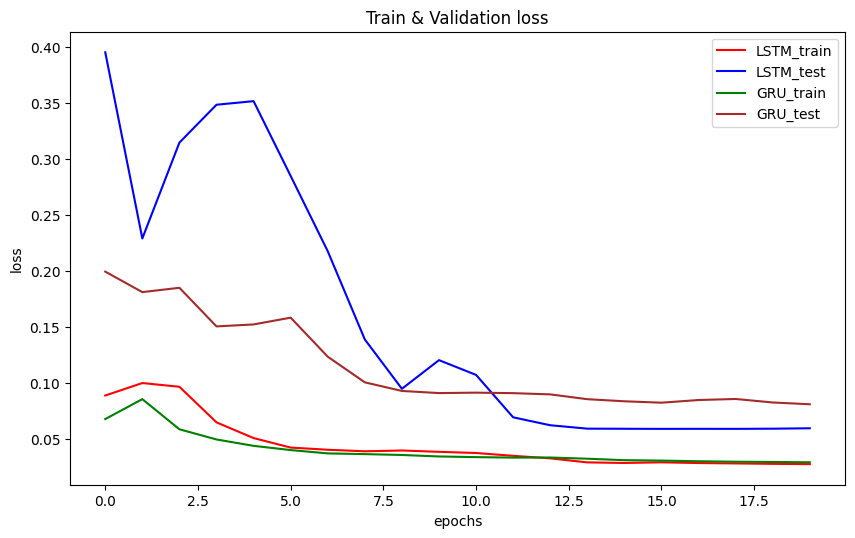

In [112]:
plt.figure(figsize=(10,6),dpi=100)
plt.plot(history_lstm.history['loss'],label='LSTM_train',color='red'
        )
plt.plot(history_lstm.history['val_loss'],label='LSTM_test',color='blue'
        )
plt.plot(history_gru.history['loss'],label='GRU_train',color='green'
        )
plt.plot(history_gru.history['val_loss'],label='GRU_test',color='brown'
        )
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Train & Validation loss')
plt.show()


<p>
We can see that, in both cases the training losses is considerably lower than validation losses indicating models may have under-fitting the training data. The performance may be improved by increasing the epochs which can be experimented.
</p>

<h1>LSTM Prediction</h1>
<p>This gives us the scale down values of prediction; we inverse the scale and need to bring these values to normal scale. Let us find out the scaling level of our data.</p>

In [113]:
scaler.scale_

array([1.4295007e-04, 1.4303184e-04, 1.4378145e-04, 1.4329830e-04,
       3.3353560e+00, 1.3463591e-01, 1.0832476e-03, 8.7244814e-04,
       1.3070273e-04, 1.3411342e-04, 1.5190768e-04, 1.1267433e-02,
       9.9999998e-03, 1.2999566e-04, 1.3143483e-04, 1.4875985e-04,
       1.4659822e-04, 1.5760520e-03, 1.2991983e-04, 1.3297661e-04,
       1.4374341e-04, 1.4329830e-04, 1.3577365e-04], dtype=float32)

In [114]:
# Here, the 1st value is the Open price; to bring this to normal scale, we divide this value by 1 as shown below.

In [124]:
y_pred = model_lstm.predict(X_test)

In [127]:
noramal_scale = 1/1.4295007e-04

In [128]:
noramal_scale

6995.449530035207

In [129]:
y_pred = y_pred*noramal_scale

In [130]:
y_test = y_test*noramal_scale

In [155]:
print("mean of y_test {} and y_pred {}".format(y_test.mean(),y_pred.mean()))

mean of y_test 8269.71875 and y_pred 8248.4541015625


In [156]:
mean_y_test = y_test.mean()
mean_y_pred = y_pred.mean()
accuracy = round((mean_y_test/mean_y_pred)*100,2)
print("RMSE :{}".format(accuracy))

RMSE :100.26


[reshape 3d into 2d](https://stackoverflow.com/questions/33211988/python-reshape-3d-array-into-2d)

[parameters tuning for lstm](https://stats.stackexchange.com/questions/351808/lstm-time-series-forecasting-accuracy)

[model inspiration](https://towardsdatascience.com/forecasting-with-technical-indicators-and-gru-lstm-rnn-multivariate-time-series-a3244dcbc38b)

In [ ]:
# lets check the GRU accuracy

In [157]:
y_pred1 = model_gru.predict(X_test)


In [159]:
y_pred1 = y_pred1*noramal_scale
y_test1 = y_test*noramal_scale

In [160]:
print("mean of y_test1 {} and y_pred1 {}".format(y_test1.mean(),y_pred1.mean()))

mean of y_test1 57850400.0 and y_pred1 55596264.0


In [161]:
mean_y_test1 = y_test1.mean()
mean_y_pred1 = y_pred1.mean()
accuracy1 = round((mean_y_test1/mean_y_pred1)*100,2)
print("RMSE :{}".format(accuracy1))

RMSE :104.05


In [ ]:
# there is room for paramets tuning of the model